In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data가져오기와 데이터 분류

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
                            keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0  # 정규화

train_scaled, val_scaled, train_target, val_target = \
                        train_test_split(
                            train_scaled,
                            train_target,
                            test_size=0.2,
                            random_state=42
                        )

In [3]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
# 모델 구성 및 Summary
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 훈련 및 과정에 대한 history 보기
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
        train_scaled,
        train_target,
        epochs=5
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7660 - loss: 0.6836
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.4064
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3595
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8792 - loss: 0.3323
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8855 - loss: 0.3172


In [6]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

#### 손실곡선

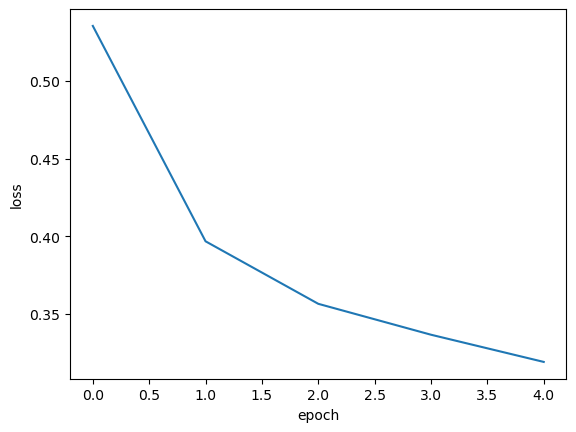

In [7]:
# History loss의 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

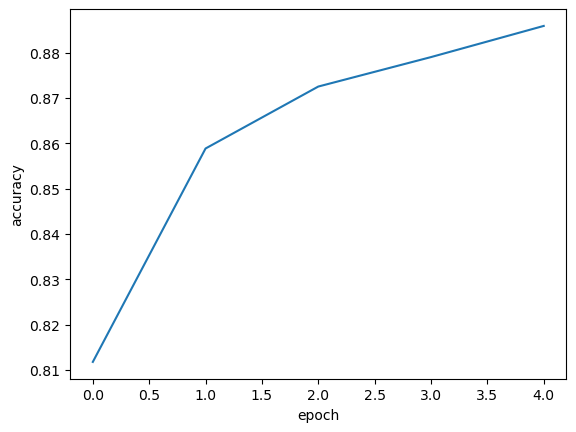

In [8]:
# History accuracy의 시각화

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

> epochs를 늘리면 정확도가 더 올라가고 손실이 더 떨어질것 같음

----
#### 반복 훈련의 증가(epochs의 증가)

In [9]:
# 훈련 및 과정에 대한 history 보기

model = model_fn()
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
        train_scaled,
        train_target,
        epochs=20
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7687 - loss: 0.6552
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8553 - loss: 0.3995
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3535
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8790 - loss: 0.3354
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.3103
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8906 - loss: 0.3042
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8942 - loss: 0.2891
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9009 - loss: 0.2822
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9024 - loss: 0.2728
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9039 - loss: 0.2734
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9073 - loss: 0.2623
Epoch 12/20
1500/1500 ━━━━━━━━

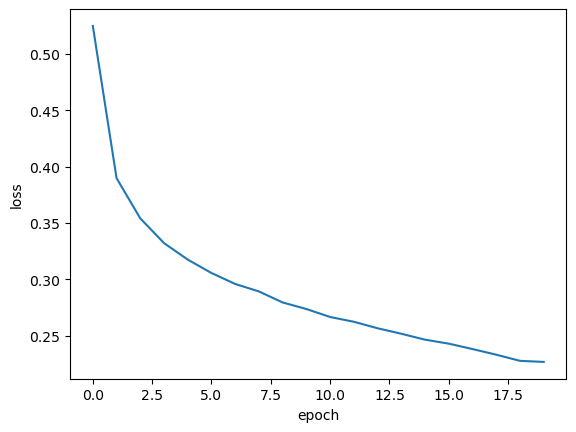

In [10]:
# History의 loss 시각화 
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

----
#### 검증 손실
: 검증세트에 대한 정확도를 파악하기 위해 validation_data를 사용한다.

In [11]:
# 훈련 및 과정에 대한 history 보기

model = model_fn()
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
        train_scaled,
        train_target,
        epochs=20,
        validation_data=(val_scaled, val_target)
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7672 - loss: 0.6858 - val_accuracy: 0.8278 - val_loss: 0.4611
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8509 - loss: 0.4132 - val_accuracy: 0.8619 - val_loss: 0.3962
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3600 - val_accuracy: 0.8703 - val_loss: 0.3651
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8796 - loss: 0.3329 - val_accuracy: 0.8786 - val_loss: 0.3495
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8908 - loss: 0.3123 - val_accuracy: 0.8688 - val_loss: 0.3851
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8891 - loss: 0.3117 - val_accuracy: 0.8800 - val_loss: 0.3514
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8965 - loss: 0.2931 - val_accuracy: 0.8838 - val_loss: 0.3564
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9020 - loss: 0.2839 - 

In [12]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


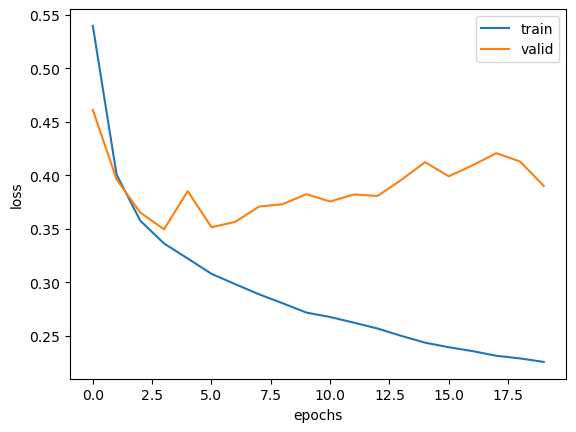

In [13]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나    
검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.    
이 모델은 훈련세트에는 정확도가 높아 좋지만 검증세트에는 적합하지 않은 과대적합 모델이다.   

----
#### Optimizer 사용(adam)

In [14]:
model = model_fn()
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7701 - loss: 0.6682 - val_accuracy: 0.8428 - val_loss: 0.4312
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8559 - loss: 0.4013 - val_accuracy: 0.8695 - val_loss: 0.3726
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3531 - val_accuracy: 0.8648 - val_loss: 0.3694
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8800 - loss: 0.3296 - val_accuracy: 0.8773 - val_loss: 0.3424
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8884 - loss: 0.2995 - val_accuracy: 0.8689 - val_loss: 0.3656
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8937 - loss: 0.2860 - val_accuracy: 0.8810 - val_loss: 0.3270
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8967 - loss: 0.2766 - val_accuracy: 0.8752 - val_loss: 0.3441
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9001 - loss: 0.2680 - 

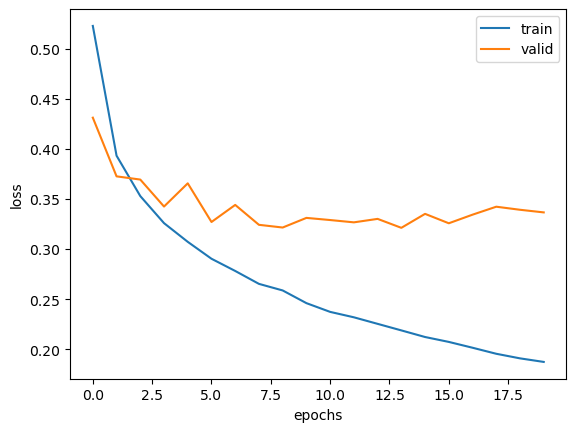

In [15]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

> Optimizer(최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증손실에 대한 부분(과대적합)은 아직 해결이 않됨.

---
#### Dropout
- 과대적합 방지를 위한 규제(머신러닝에서는  L1, L2규제)
- 신경망 모델에만 있음
- 훈련시에만 각 Sample을 처리할때 마다 은닉층의 임의의 node(neuron)을 계산에 포함시키지 않는다.

In [16]:
# model에 dropout을 추가
model = model_fn(keras.layers.Dropout(0.3)) # drop out : 30% 
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7297 - loss: 0.7754 - val_accuracy: 0.8457 - val_loss: 0.4399
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8381 - loss: 0.4524 - val_accuracy: 0.8591 - val_loss: 0.3820
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8496 - loss: 0.4142 - val_accuracy: 0.8628 - val_loss: 0.3727
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3900 - val_accuracy: 0.8751 - val_loss: 0.3430
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8667 - loss: 0.3683 - val_accuracy: 0.8739 - val_loss: 0.3463
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8693 - loss: 0.3559 - val_accuracy: 0.8733 - val_loss: 0.3523
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3434 - val_accuracy: 0.8740 - val_loss: 0.3444
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8743 - loss: 0.3333 - 

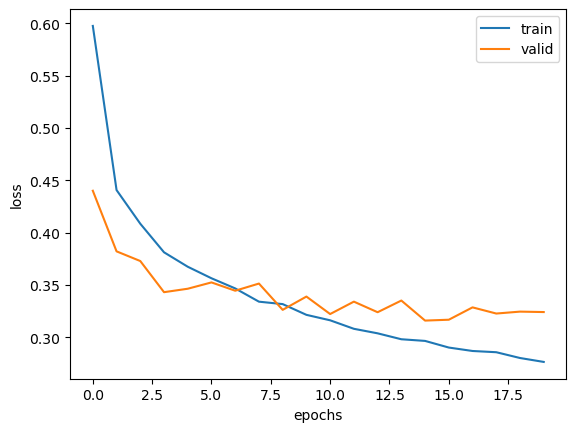

In [18]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

> epochs가 10일 경우가 train과 val의 차이가 적은 것 같다.    
기본적으로 훈련세트의 손실이 검증세트보다는 적게 나오는 epochs의 갯수를 선택 

---
##### 최적화된 Hyper Parameter값으로 모델을 재구성

In [19]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out : 30% 
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=10,
    validation_data=(val_scaled, val_target)
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7286 - loss: 0.7687 - val_accuracy: 0.8516 - val_loss: 0.4227
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8418 - loss: 0.4422 - val_accuracy: 0.8623 - val_loss: 0.3850
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8499 - loss: 0.4108 - val_accuracy: 0.8694 - val_loss: 0.3634
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8619 - loss: 0.3820 - val_accuracy: 0.8727 - val_loss: 0.3513
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8646 - loss: 0.3705 - val_accuracy: 0.8724 - val_loss: 0.3481
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8692 - loss: 0.3529 - val_accuracy: 0.8756 - val_loss: 0.3361
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8740 - loss: 0.3461 - val_accuracy: 0.8783 - val_loss: 0.3372
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8754 - loss: 0.3345 - 

----
#### 모델의 저장과 복원

In [20]:
# Model의 전체를 저장
model.save("../Data/model_whole.keras")

In [21]:
# 복원
model1 = keras.models.load_model("../Data/model_whole.keras")

In [22]:
# 사용
model1.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.8852 - loss: 0.3214


[0.32547110319137573, 0.8846666812896729]

---
#### Callbacks
: 훈련수행시 손실값이 제일 작은 모델을 저장해준다 <- 굉장히 편함

In [23]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out : 30% 
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_model.keras")

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7339 - loss: 0.7697 - val_accuracy: 0.8397 - val_loss: 0.4398
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8394 - loss: 0.4476 - val_accuracy: 0.8600 - val_loss: 0.3829
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8543 - loss: 0.4025 - val_accuracy: 0.8615 - val_loss: 0.3757
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.3893 - val_accuracy: 0.8650 - val_loss: 0.3689
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8668 - loss: 0.3634 - val_accuracy: 0.8713 - val_loss: 0.3584
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8704 - loss: 0.3580 - val_accuracy: 0.8758 - val_loss: 0.3425
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8722 - loss: 0.3444 - val_accuracy: 0.8745 - val_loss: 0.3468
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8762 - loss: 0.3318 - 

In [24]:
model = keras.models.load_model("../Data/best_model.keras")
model.evaluate(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.9206 - loss: 0.2123


[0.21512380242347717, 0.9202499985694885]

In [25]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8905 - loss: 0.3113


[0.31378769874572754, 0.890250027179718]

---
#### Early-Stopping(조기종료)
: Callbacks를 끝까지 기다리는 것이 아니고 Hyper Parameter(patience)을 선정하여 한계값을 정해 실행한다. 

In [26]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out : 30% 
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(
                            patience=2,
                            # 최저 손실값이 다음 진행시 2번이상 낮은값이 발생하지 않으면 적용
                            # (참을성 한계)
                            restore_best_weights=True
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7369 - loss: 0.7658 - val_accuracy: 0.8344 - val_loss: 0.4531
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8356 - loss: 0.4556 - val_accuracy: 0.8530 - val_loss: 0.3971
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8491 - loss: 0.4113 - val_accuracy: 0.8653 - val_loss: 0.3656
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8582 - loss: 0.3885 - val_accuracy: 0.8711 - val_loss: 0.3497
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8651 - loss: 0.3662 - val_accuracy: 0.8733 - val_loss: 0.3439
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8701 - loss: 0.3574 - val_accuracy: 0.8742 - val_loss: 0.3452
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8725 - loss: 0.3414 - val_accuracy: 0.8781 - val_loss: 0.3433
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8743 - loss: 0.3385 - 

In [27]:
# 몇번째 epochs에서 stop 되었는가?
early_stopping_cb.stopped_epoch

13

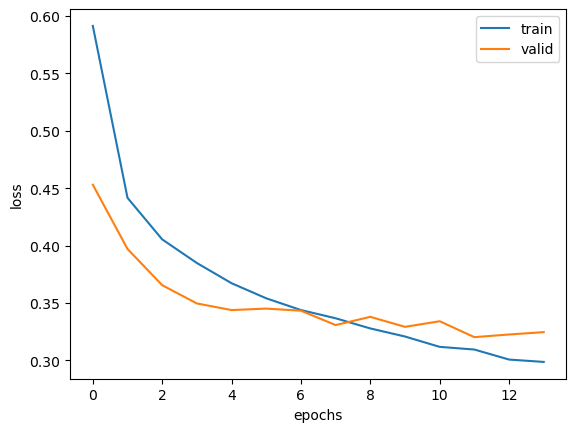

In [28]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'valid'])
plt.show()

In [29]:
model = keras.models.load_model("../Data/best_model.keras")
model.evaluate(train_scaled, train_target)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9076 - loss: 0.2454


[0.24738724529743195, 0.9087708592414856]

In [30]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8859 - loss: 0.3234


[0.32467225193977356, 0.8852499723434448]